# Project: Wrangling and Analyze Data

## Data Gathering

I'll start by importing all the modules needed for this project

In [1]:
import numpy as np
import pandas as pd
import configparser as cf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import requests
import tweepy
import json
import os
import re
%matplotlib inline

Now, I'll import our first dataset: the twitter archive from We Rate Dogs

In [2]:
#reading the file into a pandas DataFrame
df_archives = pd.read_csv('twitter-archive-enhanced.csv')
df_archives

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


I'll also download the image predictions programmatically in the next couple of cells

In [3]:
#creating a folder to hold the request response if it doesn't exist in the directory
response_folder = 'image_predictions'
if not os.path.exists(response_folder):
    os.makedirs(response_folder)

In [5]:

#downloading image predictions using the get method of the requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)


In [6]:

#opening the file in write binary mode and saving it
with open(os.path.join(response_folder, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    

In [7]:
#confirming that the image_predictions file has been susccessfully saved
os.listdir(response_folder)

['image-predictions.tsv']

In [8]:
#reading the image predictions file into a pandas dataframe
df_image_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')
df_image_predictions.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Next, I'll query the Twitter API to get the retweet and favorite counts for each tweet_id in the twitter_archive DataFrame

In [9]:
#using ConfigParser to hide my twitter API keys
config = cf.ConfigParser()
config.read('config.ini')

['config.ini']

In [10]:
#reading our API information using configparser
api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

In [11]:
#api authentication 
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

#initializing API instance
api = tweepy.API(auth, wait_on_rate_limit=True) #wait_on_rate_limit_notify=True )

In [ ]:
#querying twitter api for each tweet's retweets and favourites counts
status_list = []
error_tweet_id = []
twitter_data = []
for tweet in df_archives['tweet_id']:
    try:
        tweets_id = tweet
        status = api.get_status(tweets_id, tweet_mode='extended')
        twitter_data.append([tweets_id, status.retweet_count, status.favorite_count])
    except:
        #for debugging purposes, I'm printing out the tweet Ids that throw errors
        error_tweet_id.append(tweet)
        print(tweet)
        continue
        

    

In [ ]:
print(len(twitter_data))

In [ ]:
#saving the twitter api data as a text file

# open file in write mode
with open(r'/Users/OvyEvbodi/Desktop/alx_school/wrangling_folder/tweets_json.txt', 'w') as f:
    for data in twitter_data:
        # write each item on a new line
        f.write("%s\n" % data)
    print('Done')
    


In [ ]:
#creating a pandas DataFrame for the twitter api data
columns = ["tweet_id", "retweet_count", "favorite_count"]
twitter = pd.DataFrame(twitter_data, columns = columns )
twitter.to_csv("tweet_json.txt")

In [12]:
#reading the txt file into a pandas DataFrame
df_twitter_api = pd.read_csv('tweet_json.txt')
df_twitter_api = df_twitter_api[['tweet_id', 'retweet_count', 'favorite_count']]

df_twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2321 non-null   int64
 1   retweet_count   2321 non-null   int64
 2   favorite_count  2321 non-null   int64
dtypes: int64(3)
memory usage: 54.5 KB


<hr>

## Assessing 

In this section, I'll be assessing all 3 DataFrames both visually and programmatically, to determine any quality and tidiness issues that they have. <br> 
Most of my visual assessment will be carried out using Google spreadsheet, however, any issues noted will be properly documented here or in my data wrangling report.

### Visual assssment

Upon visual assesment of the datasets, I noted the following:
- Datasets need to be merged using the twitter id.
- The ratings were not properly extracted from the text column.
- The dog stage values were entered in 4 columns instead of one.

### Programmatic assessment

I'll start by exploring the DataFrames programmatically, and getting some information on them.


In [13]:
#getting the info of the df_archives DataFrame to check for null values and erroneous datatypes
df_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- The timestamp column has an erroneous datatype.

In [14]:
#getting the info of the df_image_predictions DataFrame to check for null values and erroneous datatypes
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- The number of enteries are lower than that in the twitter archives DataFrame, this means that some tweets do not have image predictions

In [15]:
#getting the info of the df_twitter_api DataFrame to check for null values and erroneous datatypes
df_twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2321 non-null   int64
 1   retweet_count   2321 non-null   int64
 2   favorite_count  2321 non-null   int64
dtypes: int64(3)
memory usage: 54.5 KB


- The number of enteries are lower than that in the twitter archives DataFrame, this means that some tweets do not have retweet and favorite counts.

In [16]:
#getting a statistical summary of the image predictions Dataframe
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


- Tweet_id should not be analysed statistically.

In [17]:
#checking for duplicate rows in the archives DataFrame
df_archives.duplicated().sum()

0

In [18]:
#checking for duplicate rows in the image_predictions DataFrame
df_image_predictions.duplicated().sum()

0

In [19]:
#checking for duplicate rows in the twitter_api DataFrame
df_twitter_api.duplicated().sum()

0

### Issues with the DataFrames

### Quality issues
1. Invalid ratings in the twitter_archives dataFrame.
2. Some tweet_ids weren't found using the Twitter API, hence no retweet/favorite count.
3. Retweeted tweets in the twitter_archives DataFrame. 
4. Some tweets don't have image predictions.
5. Erroneous datatype for the timestamp column in the twitter_archives DataFrame.
6. Irrelevant columns such as: 'source', 'expanded_urls', 'name', 'jpg_url', 'in_reply_to_status' and 'in_reply_to_user' in the twitter_archivesDataFrame.
7. Tweet id should be a string column.
8. Duplicate records.

### Tidiness issues
1. Dog stages are 4 columns instead of 1.
2. 3 DataFrames instead of 1.

## Cleaning Data

Before cleaning the DataFrames, I'll make copies of each so that the original dataFrames remain unaltered throughout my cleaning process.

In [20]:
#making copies of all 3 datasets
df_archives_clean = df_archives.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_twitter_api_clean = df_twitter_api.copy()

### Tidiness Issue #1 
Dog stages are 4 columns instead of 1.

#### Define
- Convert string 'None' values to NaN datatype.
- Create 1 single column for the dog classification.
- Drop the doggo, floofer, pupper and puppo columns.

#### Code

In [21]:
#getting an overview of the df_archives_clean DataFrame
df_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
#understanding the dog stage columns by looking at the DataFrame
df_archives_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [23]:
#changing the none values to NaN so that they can be read as null values.
df_archives_clean['doggo'].replace('None', np.nan, inplace=True)
df_archives_clean['puppo'].replace('None', np.nan, inplace=True)
df_archives_clean['floofer'].replace('None', np.nan, inplace=True)
df_archives_clean['pupper'].replace('None', np.nan, inplace=True)

In [24]:
#unpivoting the dog stages columns into 1 single column
df_archives_clean = pd.melt(df_archives_clean, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
 'timestamp', 'source', 'text', 'retweeted_status_id',
 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
  'rating_denominator', 'name'], var_name='stages', value_name='dog_stage')

In [25]:
#dropping the stage_value column as it makes our data untidy
df_archives_clean.drop('stages', axis=1, inplace=True)


#### Test

In [26]:
#checking to see if the columns have been successfully unpivoted.
df_archives_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [27]:
#confirming the columns 
df_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    9424 non-null   int64  
 1   in_reply_to_status_id       312 non-null    float64
 2   in_reply_to_user_id         312 non-null    float64
 3   timestamp                   9424 non-null   object 
 4   source                      9424 non-null   object 
 5   text                        9424 non-null   object 
 6   retweeted_status_id         724 non-null    float64
 7   retweeted_status_user_id    724 non-null    float64
 8   retweeted_status_timestamp  724 non-null    object 
 9   expanded_urls               9188 non-null   object 
 10  rating_numerator            9424 non-null   int64  
 11  rating_denominator          9424 non-null   int64  
 12  name                        9424 non-null   object 
 13  dog_stage                   394 n

<hr>

### Tidiness Issue #2 
3 DataFrames instead of 1.

#### Define
- Merge the twitter_archives, twitter_api and image_predictions dataFrames together using the tweet id, to create a master DataFrame

#### Code

In [28]:
# merging the twitter_archives and twitter_api DataFrames together first.
df_semi_master = pd.merge(df_archives_clean, df_twitter_api_clean, how='outer', on='tweet_id')

In [29]:
# merging them with the image_predictions dataframe to create a master DataFrame.
df_master = pd.merge(df_semi_master, df_image_predictions_clean, on='tweet_id', how='outer')


#### Test

In [30]:
#confirming our column names using the ".info()" method to make sure that all 3 DataFrames have been merged.
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9424 entries, 0 to 9423
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    9424 non-null   int64  
 1   in_reply_to_status_id       312 non-null    float64
 2   in_reply_to_user_id         312 non-null    float64
 3   timestamp                   9424 non-null   object 
 4   source                      9424 non-null   object 
 5   text                        9424 non-null   object 
 6   retweeted_status_id         724 non-null    float64
 7   retweeted_status_user_id    724 non-null    float64
 8   retweeted_status_timestamp  724 non-null    object 
 9   expanded_urls               9188 non-null   object 
 10  rating_numerator            9424 non-null   int64  
 11  rating_denominator          9424 non-null   int64  
 12  name                        9424 non-null   object 
 13  dog_stage                   394 n

<hr>

### Quality Issue #1
Invalid ratings in the twitter_archives dataFrame.

#### Define
- Extract ratings from the text column.
- Delete the exisiting numerator column and create a new column with the valid ratings.
- Drop all rows without valid ratings
- convert the new ratings numerator column datatype to integar.


#### Code

In [31]:
#extracting the ratings from the text column and creating new ratings, numerator and denominator columns
#I decided to work with rating numerators from 1-20 
df_master['valid_rating'] = df_master.text.str.extract('(\d{1,2}\/[1][0])' , expand=True)
df_master[['valid_numerator', 'valid_denominator']] = df_master['valid_rating'].str.split('/', n=1, expand=True)


In [32]:
#removing the rows without ratings
df_master = df_master[~df_master['valid_rating'].isnull()]

In [33]:
#dropping the former ratings columns and the new ratings column before the split
df_master = df_master.drop(['rating_numerator', 'rating_denominator', 'valid_rating'], axis = 1)

In [34]:
#converting the ratings columns to the ingetar datatype
df_master['valid_numerator'] = df_master['valid_numerator'].astype('int')
df_master['valid_denominator'] = df_master['valid_denominator'].astype('int')

#### Test

In [35]:
#checking to make sure that all rows with invalid ratings were sucessfully dropped
df_master['valid_numerator'].isnull().sum()

0

In [36]:
#checking to make sure that all rows with invalid ratings were sucessfully dropped
df_master['valid_denominator'].isnull().sum()

0

In [37]:
#confirming the columns in the DataFrame
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 9423
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    9360 non-null   int64  
 1   in_reply_to_status_id       296 non-null    float64
 2   in_reply_to_user_id         296 non-null    float64
 3   timestamp                   9360 non-null   object 
 4   source                      9360 non-null   object 
 5   text                        9360 non-null   object 
 6   retweeted_status_id         724 non-null    float64
 7   retweeted_status_user_id    724 non-null    float64
 8   retweeted_status_timestamp  724 non-null    object 
 9   expanded_urls               9136 non-null   object 
 10  name                        9360 non-null   object 
 11  dog_stage                   394 non-null    object 
 12  retweet_count               9220 non-null   float64
 13  favorite_count              9220 

In [38]:
#confirming the new ratings
df_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,valid_numerator,valid_denominator
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13,10
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13,10
2,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13,10
3,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13,10
4,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,7,10
9420,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8,10
9421,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8,10
9422,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8,10


<hr>

### Quality Issue #2
Some tweet_ids weren't found using the Twitter API, hence no retweet/favorite count.

#### Define
- Remove rows without retweet counts.

#### Code

In [39]:
#dropping all rows without retweet count values
df_master = df_master[~df_master['retweet_count'].isnull()]


#### Test

In [40]:
#confirming that those rows were dropped
df_master[df_master['retweet_count'].isnull()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,valid_numerator,valid_denominator


<hr>

### Quality Issue #3
Retweeted tweets in the twitter_archives DataFrame.

#### Define
- Query the Dataframe to find retweeted enteries.
- Drop all rows that aren't original tweets.

#### Code

In [41]:
#locating and removing all the records that are retweets
df_master = df_master[~df_master['text'].str.startswith('RT')]
df_master = df_master.reset_index()

#### Test

In [42]:
# Confirming that no text value is a retweeted tweet
df_master[df_master['text'].str.startswith('RT')]

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,valid_numerator,valid_denominator


<hr>

### Quality Issue #4
Some tweets don't have image predictions.

#### Define 
- Remove rows that lack image predictions

#### Code

In [43]:
#checking for rows without predictions
df_master = df_master[~df_master['p1'].isnull()]

#### Test

In [44]:
df_master[df_master['p1'].isnull()]

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,valid_numerator,valid_denominator


<hr>

### Quality Issue #5
Erroneous datatype for the timestamp column in the twitter_archives DataFrame.

#### Define
- Change the p1_dog, p2_dog and p3_dog columns datatypes to boolean.
- Change the timestamp column datatype to datetime.
- Change the retweet count and favorite count columns datatypes to integar.


#### Code

In [45]:
#fixing the datatypes
df_master['p1_dog'] =  df_master['p1_dog'].astype('bool')
df_master['p2_dog'] =  df_master['p2_dog'].astype('bool')
df_master['p3_dog'] =  df_master['p3_dog'].astype('bool')
df_master['timestamp'] = pd.to_datetime(df_master['timestamp'])
df_master['retweeted_status_timestamp'] = pd.to_datetime(df_master['retweeted_status_timestamp'])


df_master['retweet_count'] = df_master['retweet_count'].astype('int')
df_master['favorite_count'] = df_master['favorite_count'].astype('int')


#### Test

In [46]:
#calling info on df_master to check if the data types of all columns are appropriate
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7864 entries, 0 to 8571
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   index                       7864 non-null   int64              
 1   tweet_id                    7864 non-null   int64              
 2   in_reply_to_status_id       88 non-null     float64            
 3   in_reply_to_user_id         88 non-null     float64            
 4   timestamp                   7864 non-null   datetime64[ns, UTC]
 5   source                      7864 non-null   object             
 6   text                        7864 non-null   object             
 7   retweeted_status_id         0 non-null      float64            
 8   retweeted_status_user_id    0 non-null      float64            
 9   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 10  expanded_urls               7864 non-null   object          

### Quality Issue #6
Irrelevant columns such as: 'source', 'expanded_urls', 'name', 'jpg_url', 'in_reply_to_status' and 'in_reply_to_user' in the twitter_archivesDataFrame.

#### Define 
- Drop the 'source', 'expanded_urls', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'name', 'text', 'retweeted_status_user_id' and  'retweeted_status_timestamp' columns.

#### Code

In [47]:
#dropping irrelevant columns

df_master = df_master.drop(['source', 'expanded_urls', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'name', 'text', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'index'], axis=1)


#### Test

In [48]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7864 entries, 0 to 8571
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   tweet_id           7864 non-null   int64              
 1   timestamp          7864 non-null   datetime64[ns, UTC]
 2   dog_stage          314 non-null    object             
 3   retweet_count      7864 non-null   int64              
 4   favorite_count     7864 non-null   int64              
 5   img_num            7864 non-null   float64            
 6   p1                 7864 non-null   object             
 7   p1_conf            7864 non-null   float64            
 8   p1_dog             7864 non-null   bool               
 9   p2                 7864 non-null   object             
 10  p2_conf            7864 non-null   float64            
 11  p2_dog             7864 non-null   bool               
 12  p3                 7864 non-null   object       

<hr>

### Quality Issue #7
Tweet id should be a string column.

#### Definne 
- Convert Tweet_id data type to string

#### Code

In [49]:
#converting the tweet_id datatype to string
df_master['tweet_id'] = df_master['tweet_id'].astype('str')

#### Test

In [66]:
#confirming the datatype of tweet_id
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7864 entries, 0 to 8571
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   tweet_id           7864 non-null   object             
 1   timestamp          7864 non-null   datetime64[ns, UTC]
 2   dog_stage          314 non-null    object             
 3   retweet_count      7864 non-null   int64              
 4   favorite_count     7864 non-null   int64              
 5   img_num            7864 non-null   float64            
 6   p1                 7864 non-null   object             
 7   p1_conf            7864 non-null   float64            
 8   p1_dog             7864 non-null   bool               
 9   p2                 7864 non-null   object             
 10  p2_conf            7864 non-null   float64            
 11  p2_dog             7864 non-null   bool               
 12  p3                 7864 non-null   object       

<hr>

### Quality Issue #8
Duplicate records 

#### Define 
- Check for duplicates in the tweet_id column.
- Drop the duplicate rows.

#### Code

In [71]:
#checking for duplicates in the master dataFrame and dropping them
df_master = df_master[~df_master.duplicated()]

In [110]:
#resetting the index
df_master.reset_index(drop = True, inplace = True)

#### Test

In [112]:
#checking for duplicates in the Dataframe to confirm the success of our code
df_master[df_master.duplicated()]

,tweet_id,timestamp,dog_stage,retweet_count,favorite_count,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,valid_numerator,valid_denominator,like_category


In [79]:
#confirming the number of enteries left
df_master.shape

(2280, 18)

<hr>

## Storing Data
Now, I'll save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [113]:
#storing the clean master DataFrame as a csv file.
df_master.to_csv('twitter_archive_master.csv', index=False)

<hr>

## Analyzing and Visualizing Data

### Insights:
1. 10 most common dog breeds?

2. Which dog stage had the highest numbers of likes and retweets?

3. How many dog predictions were truly dogs based on a machine learning model?

### Insights #1

- find where predictions are true.
- find the value counts.
- get the 10 most common breeds.

In [193]:
#finding all true dog predictions
true_p1 = df_master[df_master['p1_dog'] == True]

In [194]:
true_p1

,tweet_id,timestamp,dog_stage,retweet_count,favorite_count,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,valid_numerator,valid_denominator,like_category
1,892177421306343426,2017-08-01 00:17:27+00:00,NaN,5302,29340,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13,10,less likes
2,891815181378084864,2017-07-31 00:18:03+00:00,NaN,3482,22070,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12,10,less likes
4,891327558926688256,2017-07-29 16:00:24+00:00,NaN,7765,35288,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12,10,less likes
5,891087950875897856,2017-07-29 00:08:17+00:00,NaN,2602,17815,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,13,10,less likes
6,890971913173991426,2017-07-28 16:27:12+00:00,NaN,1666,10369,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,13,10,less likes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,666049248165822465,2015-11-16 00:24:50+00:00,NaN,37,89,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,5,10,less likes
2276,666044226329800704,2015-11-16 00:04:52+00:00,NaN,115,247,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,6,10,less likes
2277,666033412701032449,2015-11-15 23:21:54+00:00,NaN,36,100,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,9,10,less likes
2278,666029285002620928,2015-11-15 23:05:30+00:00,NaN,39,112,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,7,10,less likes


In [195]:
#storing the value counts for each breed in a variable
breed_counts = true_p1['p1'].value_counts()

In [196]:
#trying to get the most common breeds
breed_counts[breed_counts > 30]

golden_retriever      169
Labrador_retriever    106
Pembroke              101
Chihuahua              86
pug                    61
Pomeranian             46
Samoyed                45
chow                   44
toy_poodle             42
cocker_spaniel         32
malamute               32
Name: p1, dtype: int64

We can infer that the 10 most common dog breeds on the WeRateDogs Twitter page as at August 1st 2017 were:
1. Golden Retriever
2. Labrador Retriever
3. Pembroke
4. Chihuahua
5. Pug
6. Pomranian
7. Samoyed
8. Chow
9. Toy Poodle
10. Cocker Spaniel

### insight #2

- Group the statistically summary of the favourite_counts column by the dog stages.
- Group the statistically summary of the retweet_counts column by the dog stages.

In [197]:
#which dog stage had the highest number of likes 
df_master.groupby(['dog_stage'])['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,72.0,16772.847222,22776.396654,2163.0,6871.5,10124.5,15995.75,144952.0
floofer,8.0,11683.875000,8961.406242,1929.0,4678.5,10051.5,16126.25,28130.0
pupper,211.0,6252.345972,9833.035882,580.0,2050.5,2847.0,6801.00,108950.0
puppo,23.0,20553.391304,26431.062414,2751.0,5951.5,13358.0,18821.50,124162.0


In [198]:
#which dog stage had the highest number of retweets
df_master.groupby(['dog_stage'])['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,72.0,5625.944444,11031.176152,568.0,1646.0,2412.5,4065.75,70784.0
floofer,8.0,3839.750000,4560.803587,397.0,1772.0,2717.5,3331.00,14746.0
pupper,211.0,1911.976303,2975.960468,80.0,556.0,998.0,2048.50,30222.0
puppo,23.0,5798.869565,8653.458706,569.0,1383.5,2589.0,6018.50,39940.0


Looking at the means for both the favorite and retweet counts, we can deduce that users liked and retweeted tweets of dogs in the puppo stage more than those of dogs in other stages.

### Insight #3

- Find out how many tweets were truly dog tweets.
- Calculate the percentage of dog posts in the total number of posts available in the DataFrame.

In [199]:
#getting records where all three predictions were true and assigning the shape(axis=0 only) of the DataFrame subset into a variable
true_prediction = df_master.query('p1_dog == True | p2_dog == True | p3_dog == True').shape[0]

In [200]:
#calculating the percentage of pedictions that were true in the master DataFrame
accuracy_percentage = true_prediction / df_master.shape[0] * 100
print(accuracy_percentage)

84.47368421052632


84.47% of their posts in our DataFrame are dog posts.

### Visualization

- Visualizing which dog stage gets the highest number of retweets.

In [201]:
#getting the mean number of retweets
df_master.groupby(['dog_stage'])['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,72.0,5625.944444,11031.176152,568.0,1646.0,2412.5,4065.75,70784.0
floofer,8.0,3839.750000,4560.803587,397.0,1772.0,2717.5,3331.00,14746.0
pupper,211.0,1911.976303,2975.960468,80.0,556.0,998.0,2048.50,30222.0
puppo,23.0,5798.869565,8653.458706,569.0,1383.5,2589.0,6018.50,39940.0


In [202]:
#getting a subset of our DataFrame(guided by the mean) to make our visualization better by eliminating some extreme outliers.
df_rt_visual = df_master[df_master['retweet_count'] < 12000]

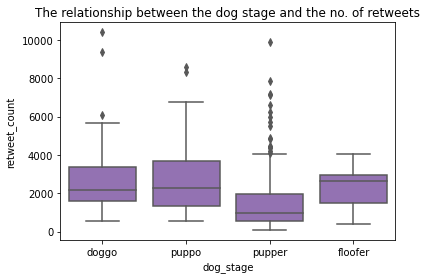

In [204]:
#plotting the relationship between the dog stage and the number of retweets
base_color = sns.color_palette()[4]
sns.boxplot(data = df_rt_visual, x = 'dog_stage', y = 'retweet_count', color = base_color).set( title='The relationship between the dog stage and the no. of retweets');

From the box plot above, tweets of dogs in the puppo stage had the highest number of retweets, while tweets of dogs in the pupper stage had the lowest.